Principal component analyst will identify data source hidden characteristics, and reduce the dimension of features. It will maximize the variance, first component can most explain the variance, and 2nd later. PCA don't use response col for projection and transformation, and it is non-supervised.

PCA use the eigenvalue decomposition in covariance matrix. It can act on correlation matrix too, if characteristic scale is similar, we can use coorelation matrix, otherwise use covariance matrix. Usually we use covariance matrix. There are 4 steps:
1. create the covariance matrix of dataset.
2. calculate eigenvalues.
3. keep the first k characteristics(chracteristics arranged in descending order)
4. use the remaining eigenvectors to convert to data points.

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

In [2]:
iris_X, iris_y = iris.data, iris.target

# check target flower names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
# check feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

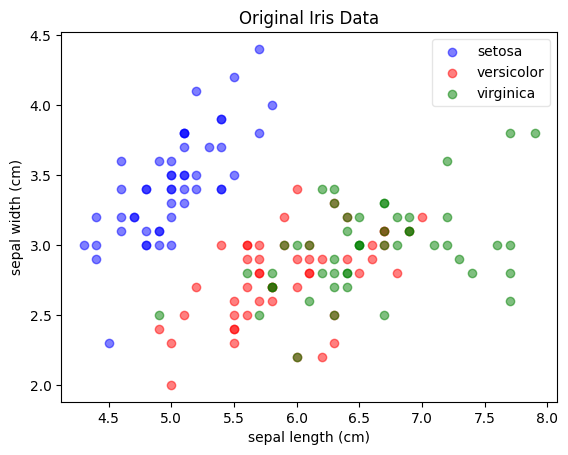

In [4]:
# for labelling: {0: 'setosa', 1: 'versicolor', 2:'virginica'}
label_dict = {i: k for i, k in enumerate(iris.target_names)}

def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label, marker, color in zip(range(3), ('^', 's', 'o'), ('blue', 'red', 'green')):
        plt.scatter(x=X[:, 0].real[y == label],
                    y=X[:, 1].real[y == label],
                    color = color,
                    alpha = 0.5,
                    label = label_dict[label])
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)
    
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

In [5]:
# manually calculate PCA
import numpy as np

# calculate mean vector
mean_vector = iris_X.mean(axis=0)
print(mean_vector)

# calculate covariance matrix
cov_mat = np.cov((iris_X).T)
print(cov_mat.shape)

[5.84333333 3.05733333 3.758      1.19933333]
(4, 4)


numpy has a function to calculate eigen vector and eigen value. 

In [6]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

# print eig vector and value in decending order
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i]
    print('Eigenvector {}: \n {}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(30 * '-')

Eigenvector 1: 
 [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Eigenvalue 1 from covariance matrix: 4.228241706034864
------------------------------
Eigenvector 2: 
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
Eigenvalue 2 from covariance matrix: 0.24267074792863386
------------------------------
Eigenvector 3: 
 [-0.58202985  0.59791083  0.07623608  0.54583143]
Eigenvalue 3 from covariance matrix: 0.07820950004291899
------------------------------
Eigenvector 4: 
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]
Eigenvalue 4 from covariance matrix: 0.023835092973450087
------------------------------


We use a scree plot(碎石圖) instead brute force to know the contribution of each component, all components add up should be 100%.

In [7]:
# each component percentage is component/ total
explained_variance_ratio = eig_val_cov / eig_val_cov.sum()
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

We can see that this 1st component count for 92% above.

Text(0, 0.5, '% of Variance Explained <= k')

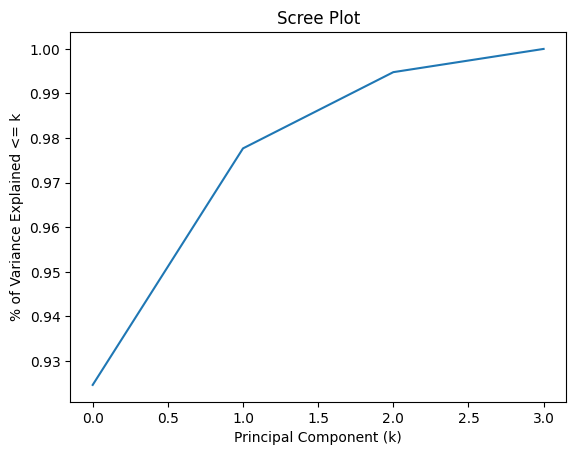

In [8]:
plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Variance Explained <= k')

We can see that first 2 components account for 98%, we can just use them as the main component. Therefore we can half the dataset and increase efficiency.

Because eigen value decomposition will make the same value of vectors as eigen vector, therefore we need to choose the amount of main components used. So it is a semi-supervised process, which consist of human input.

In [9]:
# save the 2 eigenvectors
top_2_eigenvectors = eig_vec_cov[:,:2].T

# Transpose, each row are 1 main component, 2 rows represent 2 components.
top_2_eigenvectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

iris_X(150 * 4) * top_2_eigenvector(4 * 2) = Transformed Iris Dataset(150*2)

In [10]:
# change dataset to Transformed Iris Dataset
np.dot(iris_X, top_2_eigenvectors.T)[:5, ]

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709]])

scikit-learn also have this transformation, so we don't need to write by ourself.

In [11]:
from sklearn.decomposition import PCA

# we instanstiate the class with 2 PCA object
pca = PCA(n_components=2)

# fitting data with PCA
pca.fit(iris_X)

# check PCA object characteristic, see the calculated result component same as top_2_eigenvectors or not.
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

There are nearly the same except the 2nd components have negative value, but eigenvector can be position or negative, so it do not affect.

In [12]:
# project to newe 2d plane. Because it will centralize data, it is different to manual processing.
pca.transform(iris_X)[:5,]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [13]:
# we can manually imitate the scikit learn PCA.
np.dot(iris_X-mean_vector, top_2_eigenvectors.T)[:5,]

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451]])

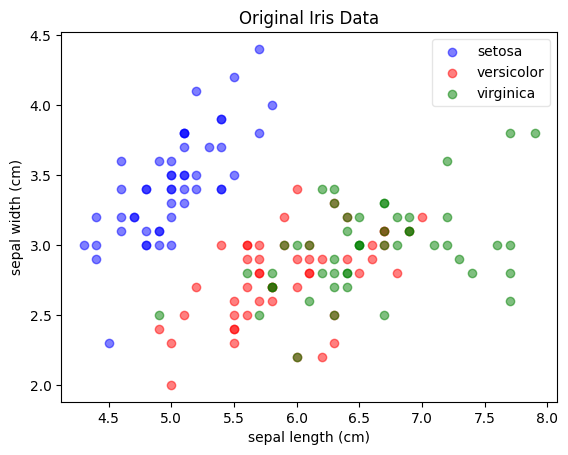

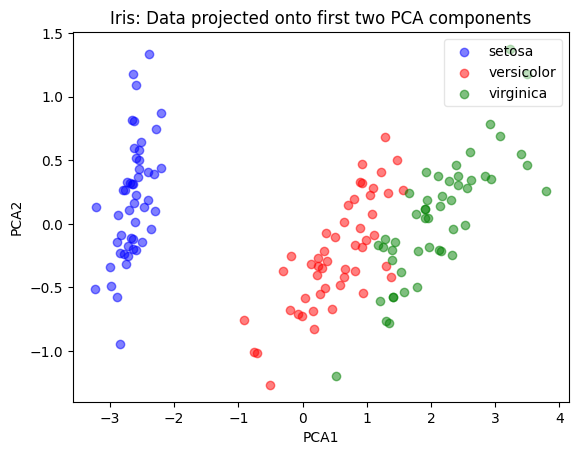

In [14]:
# plot original and new graph
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")
plt.show()
plot(pca.transform(iris_X), iris_y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

after we use PCA, data are aparted further and rotated. Data cluster are more obvious, because we let PCA captured variance.

In [15]:
# each main component explained same variance number as before
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Now we can decorrelate features. When decorrelate features, all main components are perpendicular to each other and linear independent. After projection, we want to find the average correlation coefficient, we think that it tend to 0, which mean the characteristics are linearly independent.

In [16]:
# remove correlation in PCA
np.corrcoef(iris_X.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [17]:
# get the 1 on diagonal to calculate the average correlation.
np.corrcoef(iris_X.T)[[0, 0, 0, 1, 1, 2], [1, 2, 3, 2, 3, 3]]

array([-0.11756978,  0.87175378,  0.81794113, -0.4284401 , -0.36612593,
        0.96286543])

In [18]:
#get matrix average value
np.corrcoef(iris_X.T)[[0, 0, 0, 1, 1, 2], [1, 2, 3, 2, 3, 3]].mean()

0.29007075209349553

In [19]:
# correlation is non-zero, although small
# get all main component
full_pca = PCA(n_components=4)

# PCA fit dataset
full_pca.fit(iris_X)

PCA(n_components=4)

In [20]:
pca_iris = full_pca.transform(iris_X)
# correlation coeff after PCA
np.corrcoef(pca_iris.T)[[0, 0, 0, 1, 1, 2], [1, 2, 3, 2, 3, 3]].mean()
# very near 0, because row independent.

5.999725034202585e-16

Centering and scaling effect to PCA:

In [21]:
# import our scaling model
from sklearn.preprocessing import StandardScaler

# centering data
X_centered = StandardScaler(with_std=False).fit_transform(iris_X)

X_centered[:5, ]

array([[-0.74333333,  0.44266667, -2.358     , -0.99933333],
       [-0.94333333, -0.05733333, -2.358     , -0.99933333],
       [-1.14333333,  0.14266667, -2.458     , -0.99933333],
       [-1.24333333,  0.04266667, -2.258     , -0.99933333],
       [-0.84333333,  0.54266667, -2.358     , -0.99933333]])

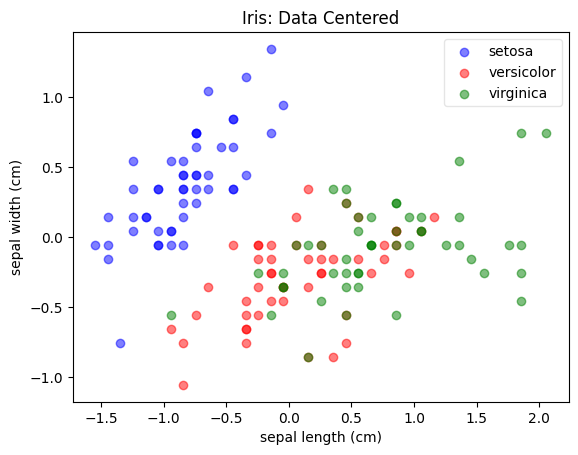

In [22]:
# plot the data after centering
plot(X_centered, iris_y, "Iris: Data Centered", "sepal length (cm)", "sepal width (cm)")

In [23]:
pca.fit(X_centered)

PCA(n_components=2)

In [24]:
# result same as before
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [25]:
# auto centering, same result again
pca.transform(X_centered)[:5,]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

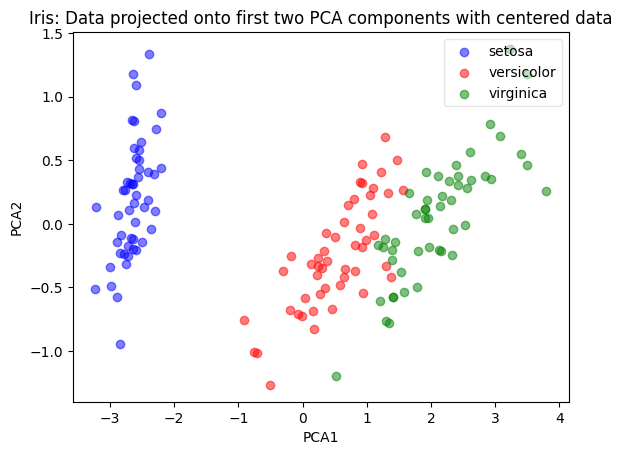

In [26]:
plot(pca.transform(X_centered), iris_y, "Iris: Data projected onto first two PCA components with centered data",
     "PCA1", "PCA2")

In [27]:
# same ratio as before
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Original matrix and centeredized matrix are same because covariance matrix are same.

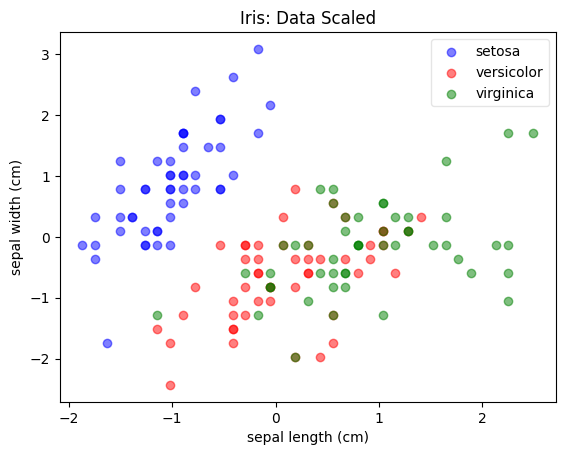

In [28]:
# z scaling, which is centered first, then divide std
X_scaled = StandardScaler().fit_transform(iris_X)
plot(X_scaled, iris_y, "Iris: Data Scaled", "sepal length (cm)", "sepal width (cm)")

In [29]:
pca.fit(X_scaled)

# different main components
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [30]:
# different scaling and projection
pca.transform(X_scaled)[:5, ]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [31]:
# check explained variance ratio
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

After we do z scaling, row covariance will become united, but the difference between each component will be less, therefore it will not focus on 1 main component.

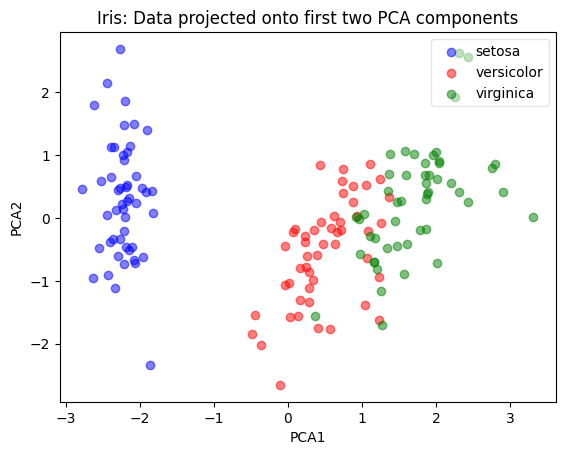

In [32]:
plot(pca.transform(X_scaled), iris_y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

In [33]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

Explaining PCA:

In [34]:
# We can use matrix multiplication calculate projection
# Original matrix(150*4) and transpose major component(4*2) multiply, we get projection data(150 *2)
np.dot(X_scaled, pca.components_.T)[:5, ]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

We calculate the dot product of original row and each main component, the result will be the new row

In [35]:
# get the first row
first_scaled_flower = X_scaled[0]

# get 2 main component
first_Pc = pca.components_[0]
second_Pc = pca.components_[1]

first_scaled_flower.shape

(4,)

In [36]:
print(first_scaled_flower)

[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]


In [37]:
# dot product of 1st row and main component give as above
np.dot(first_scaled_flower, first_Pc), np.dot(first_scaled_flower, second_Pc)

(-2.264702808807589, 0.48002659652098634)

In [38]:
# we can use build in transform method
pca.transform(X_scaled)[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [39]:
first_Pc

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [40]:
X_scaled[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

Therefore the first element is :
(0.52106591 * -0.90068117) + (-0.26934744 * 1.01900435) + (0.5804131 * -1.34022653) + (0.56485654 * -1.3154443) = -2.26470281

In [41]:
# we can run the coordinate system as this: 0.52106591a -0.26934744b + 0.5804131c + 0.56485654d, which abcd represent the 
# features below
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

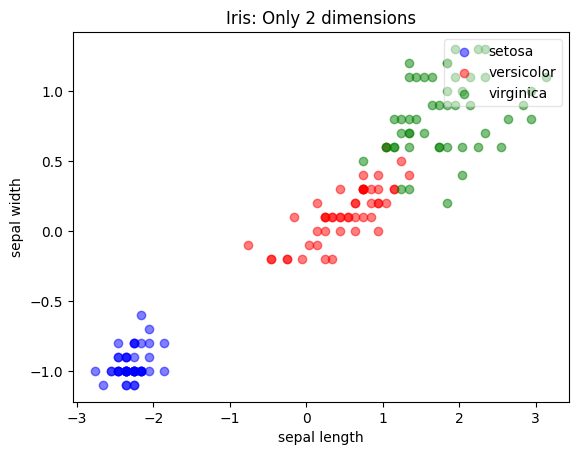

In [42]:
# remain sepal length and sepal width just for visual demonstration in 2d instead 4d

# remove last 2 component
iris_2_dim = iris_X[:, 2:4]

#centralize
iris_2_dim = iris_2_dim - iris_2_dim.mean(axis=0)

plot(iris_2_dim, iris_y, "Iris: Only 2 dimensions", "sepal length", "sepal width")

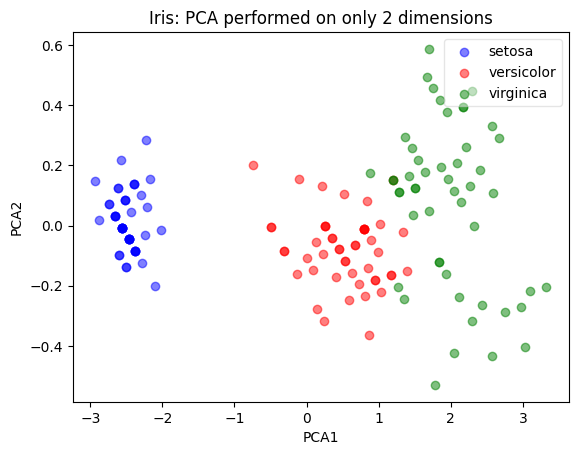

In [44]:
# keep 2 PCA
twodim_pca = PCA(n_components=2)

#fit the cutted data
iris_2_dim_transformed = twodim_pca.fit_transform(iris_2_dim)

plot(iris_2_dim_transformed, iris_y, "Iris: PCA performed on only 2 dimensions", "PCA1", "PCA2")

1. Below show the Original data and PCA projected data.
2. Each main component as 1 vector
3. long vector is 1st component, short vector is 2nd

[Text(0.5, 0, 'component 1'),
 Text(0, 0.5, 'component 2'),
 Text(0.5, 1.0, 'Projected Data'),
 (-3.0, 3.0),
 (-1.0, 1.0)]

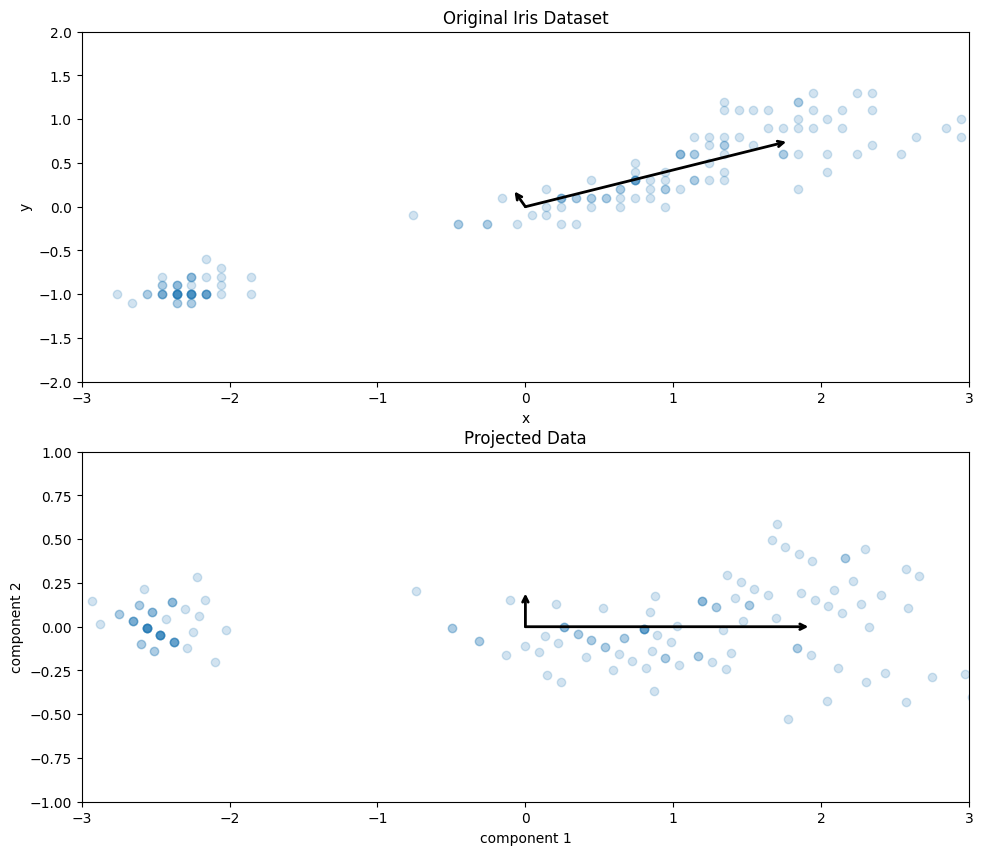

In [47]:
def draw_vector(v0, v1, ax):
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plotting
ax[0].scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2)
for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
    v = vector * np.sqrt(length) # extend vector as the length of explained_variance_
    draw_vector(twodim_pca.mean_, twodim_pca.mean_ + v, ax=ax[0])

ax[0].set(xlabel='x', ylabel='y', title='Original Iris Dataset', xlim=(-3, 3), ylim=(-2, 2))

ax[1].scatter(iris_2_dim_transformed[:, 0], iris_2_dim_transformed[:, 1], alpha=0.2)
for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
    transformed_component = twodim_pca.transform([vector])[0] # change to new coordinate system
    v = transformed_component * np.sqrt(length) # extend vector as explained_variance_
    draw_vector(iris_2_dim_transformed.mean(axis=0), iris_2_dim_transformed.mean(axis=0) + v, ax=ax[1])
    
ax[1].set(xlabel='component 1', ylabel='component 2', title='Projected Data', xlim=(-3, 3), ylim=(-1,1))

Above main component are not vertical or horizontal, it point to the data direction. 2nd component become right angle coordinate system.